In [91]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

%matplotlib inline

df = pd.read_csv('Boston.csv')
df2 = df.dropna(how = 'any', axis = 0)

dummy = pd.get_dummies(df2['CRIME'], drop_first = True)
df3 = df2.join(dummy)
df3 = df3.drop(['CRIME'], axis = 1)
df3.head(2)

df4 = df3.astype('float')
sc = StandardScaler()
sc_df = sc.fit_transform(df4)

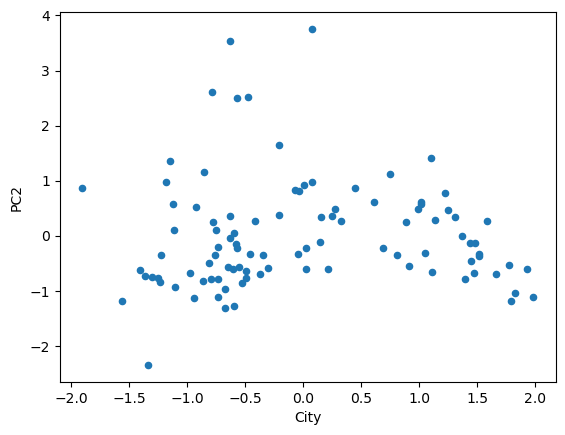

In [106]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = PCA(n_components = 2, whiten = True)
model.fit(sc_df)

new = model.transform(sc_df)
new_df = pd.DataFrame(new)
new_df.head(3)
new_df.columns = ['PC1','PC2']

df5 = pd.DataFrame(sc_df, columns = df4.columns)
df6 = pd.concat([df5, new_df], axis = 1)

df_corr = df6.corr()
pc_corr = df_corr.loc[:'very_low','PC1':]

pc_corr['PC1'].sort_values(ascending = False)
pc_corr['PC2'].sort_values(ascending = False)

new_df.columns = ['City','Exclusive residential']
new_df.plot(kind = 'scatter', x = 'City', y = 'Exclusive residential')
plt.show()